In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

from sklearn.model_selection import train_test_split

import help
from MyDataSet import MyDataset

深度学习中针对图像分类，基本上都离不开卷积(英语：Convolution)，也是卷进神经网络CNN首字母（英语：Convolution Neural Networks）。所谓2D卷积，用大白话讲，理解为一幅平面的图片上，通过卷积核（n\*m的一个二维数组）在图片上滑动（卷积处理），反复调整卷积核的参数（训练过程），从而获得一组**卷积核参数**用于提取图片特征。

<center><img id="img1" width="300px" height="300px" src="image/2D卷积.webp">2D卷积</img></center>

reshape输入的测试样本，当做300个(79,95,79)的图片处理，仿照RGB处理模式

In [2]:
features = help.features.reshape(300,79,95,79)
features.shape

(300, 79, 95, 79)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(features,help.labels['label'].values,test_size = 0.2,random_state = 42)

train_datasets = MyDataset(datas=X_train,labels=y_train,shape=2,input_D=help.input_D,input_H=help.input_H,input_W=help.input_W,phase='train')
val_datasets = MyDataset(datas=X_val,labels=y_val,shape=2,input_D=help.input_D,input_H=help.input_H,input_W=help.input_W,phase='train')

train_loader = torch.utils.data.DataLoader(dataset=train_datasets, batch_size=2, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_datasets, batch_size=1, shuffle=False)

In [ ]:
model_resnet50 = models.resnet50(pretrained=True)
fc_features = model_resnet50.fc.in_features

In [ ]:
with torch.no_grad():
    pretrained_conv1 = model_resnet50.conv1.weight.clone()
    # Assign new conv layer with 79 input channels
    model_resnet50.conv1 = torch.nn.Conv2d(features.shape[1], 64, 7, 2, 3, bias=False)
    # Use same initialization as vanilla ResNet (Don't know if good idea)
    torch.nn.init.kaiming_normal_(model_resnet50.conv1.weight, mode='fan_out', nonlinearity='relu')
    # Re-assign pretraiend weights to first 3 channels
    # (assuming alpha channel is last in your input data)
    model_resnet50.conv1.weight[:, :3] = pretrained_conv1
    
for param in model_resnet50.parameters():
    param.requires_grad = False
    
#分类器在resnet50基础上修改，输出output_size为种类3
resnet50_fc = nn.Sequential(nn.Linear(fc_features, help.num_seg_classes))
model_resnet50.fc = resnet50_fc

In [ ]:
epochs = 50
optimizer = optim.Adam(model_resnet50.fc.parameters())
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
help.train_data(model_resnet50,train_loader,val_loader,epochs,optimizer,scheduler,help.criterion,help.resnet50_2d_checkpoint_path,help.device)


In [3]:
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
index = kf.split(X=features,y=help.labels['label'].values)

K-Fold 0 start:
Epochs: 6/50... Trianing Loss:0.026... Val Loss:0.326... Val Accuracy:0.833
Epochs: 12/50... Trianing Loss:0.007... Val Loss:0.300... Val Accuracy:0.802
Epochs: 17/50... Trianing Loss:0.020... Val Loss:0.319... Val Accuracy:0.760
Epochs: 23/50... Trianing Loss:0.005... Val Loss:0.303... Val Accuracy:0.833
Epochs: 28/50... Trianing Loss:0.015... Val Loss:0.300... Val Accuracy:0.802
Epochs: 34/50... Trianing Loss:0.004... Val Loss:0.332... Val Accuracy:0.802
Epochs: 39/50... Trianing Loss:0.017... Val Loss:0.318... Val Accuracy:0.802
Epochs: 45/50... Trianing Loss:0.007... Val Loss:0.335... Val Accuracy:0.802
Epochs: 50/50... Trianing Loss:0.015... Val Loss:0.376... Val Accuracy:0.802


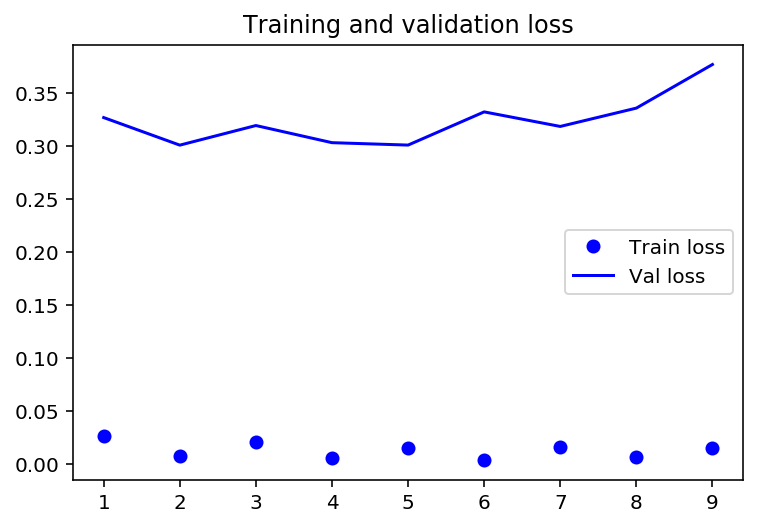

Training time is 7m 29s
K-Fold 0 end:
****************************************
K-Fold 1 start:
Epochs: 6/50... Trianing Loss:0.028... Val Loss:0.312... Val Accuracy:0.833
Epochs: 12/50... Trianing Loss:0.005... Val Loss:0.298... Val Accuracy:0.833
Epochs: 17/50... Trianing Loss:0.022... Val Loss:0.324... Val Accuracy:0.833
Epochs: 23/50... Trianing Loss:0.004... Val Loss:0.367... Val Accuracy:0.792
Epochs: 28/50... Trianing Loss:0.020... Val Loss:0.339... Val Accuracy:0.771
Epochs: 34/50... Trianing Loss:0.009... Val Loss:0.385... Val Accuracy:0.760
Epochs: 39/50... Trianing Loss:0.016... Val Loss:0.300... Val Accuracy:0.833
Epochs: 45/50... Trianing Loss:0.006... Val Loss:0.335... Val Accuracy:0.802
Epochs: 50/50... Trianing Loss:0.019... Val Loss:0.339... Val Accuracy:0.833


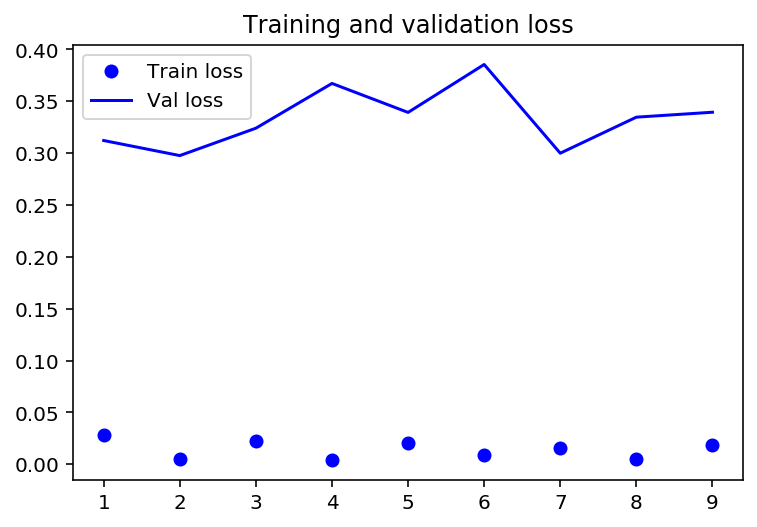

Training time is 7m 17s
K-Fold 1 end:
****************************************
K-Fold 2 start:
Epochs: 6/50... Trianing Loss:0.026... Val Loss:0.424... Val Accuracy:0.844
Epochs: 12/50... Trianing Loss:0.007... Val Loss:0.449... Val Accuracy:0.760
Epochs: 17/50... Trianing Loss:0.016... Val Loss:0.428... Val Accuracy:0.792
Epochs: 23/50... Trianing Loss:0.003... Val Loss:0.423... Val Accuracy:0.823
Epochs: 28/50... Trianing Loss:0.020... Val Loss:0.413... Val Accuracy:0.823
Epochs: 34/50... Trianing Loss:0.006... Val Loss:0.384... Val Accuracy:0.823
Epochs: 39/50... Trianing Loss:0.016... Val Loss:0.424... Val Accuracy:0.823
Epochs: 45/50... Trianing Loss:0.008... Val Loss:0.403... Val Accuracy:0.854
Epochs: 50/50... Trianing Loss:0.017... Val Loss:0.397... Val Accuracy:0.854


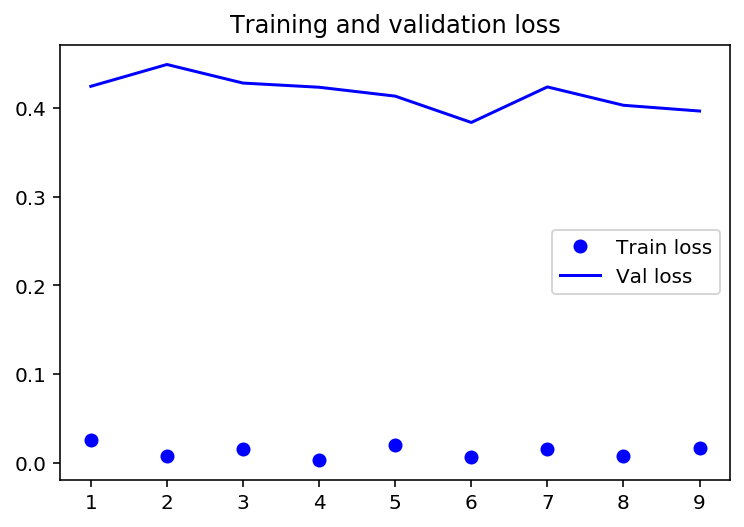

Training time is 7m 18s
K-Fold 2 end:
****************************************
K-Fold 3 start:
Epochs: 6/50... Trianing Loss:0.029... Val Loss:0.358... Val Accuracy:0.844
Epochs: 12/50... Trianing Loss:0.004... Val Loss:0.381... Val Accuracy:0.844
Epochs: 17/50... Trianing Loss:0.019... Val Loss:0.432... Val Accuracy:0.812
Epochs: 23/50... Trianing Loss:0.009... Val Loss:0.362... Val Accuracy:0.844
Epochs: 28/50... Trianing Loss:0.019... Val Loss:0.375... Val Accuracy:0.844
Epochs: 34/50... Trianing Loss:0.006... Val Loss:0.337... Val Accuracy:0.844
Epochs: 39/50... Trianing Loss:0.016... Val Loss:0.313... Val Accuracy:0.812
Epochs: 45/50... Trianing Loss:0.006... Val Loss:0.359... Val Accuracy:0.812
Epochs: 50/50... Trianing Loss:0.015... Val Loss:0.365... Val Accuracy:0.844


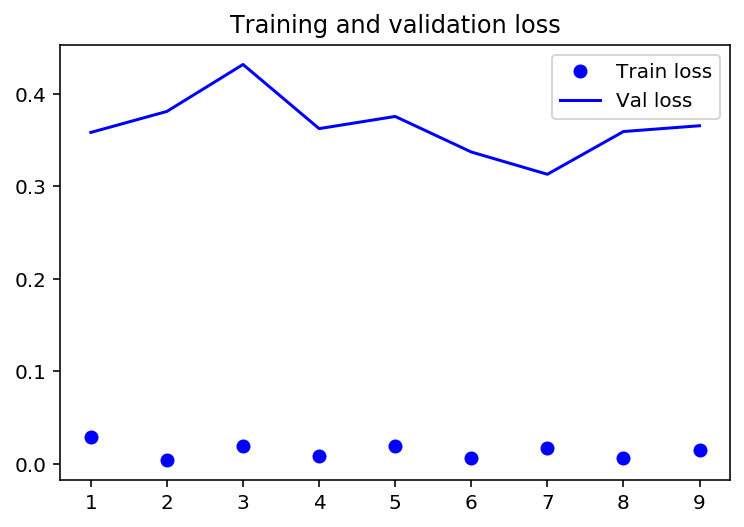

Training time is 7m 15s
K-Fold 3 end:
****************************************
K-Fold 4 start:
Epochs: 6/50... Trianing Loss:0.024... Val Loss:0.496... Val Accuracy:0.750
Epochs: 12/50... Trianing Loss:0.004... Val Loss:0.508... Val Accuracy:0.688
Epochs: 17/50... Trianing Loss:0.019... Val Loss:0.496... Val Accuracy:0.729
Epochs: 23/50... Trianing Loss:0.004... Val Loss:0.569... Val Accuracy:0.792
Epochs: 28/50... Trianing Loss:0.021... Val Loss:0.539... Val Accuracy:0.760
Epochs: 34/50... Trianing Loss:0.009... Val Loss:0.720... Val Accuracy:0.688
Epochs: 39/50... Trianing Loss:0.015... Val Loss:0.661... Val Accuracy:0.729
Epochs: 45/50... Trianing Loss:0.009... Val Loss:0.718... Val Accuracy:0.792
Epochs: 50/50... Trianing Loss:0.017... Val Loss:0.605... Val Accuracy:0.729


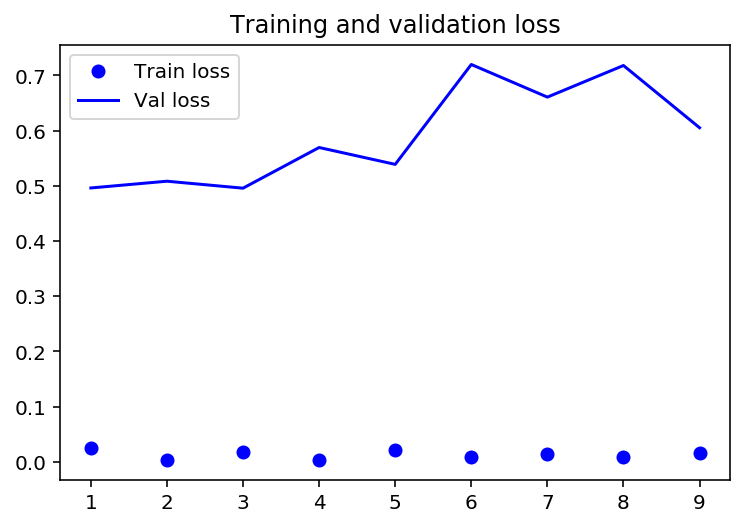

Training time is 7m 18s
K-Fold 4 end:
****************************************
K-Fold 5 start:
Epochs: 6/50... Trianing Loss:0.026... Val Loss:0.386... Val Accuracy:0.740
Epochs: 12/50... Trianing Loss:0.002... Val Loss:0.449... Val Accuracy:0.740
Epochs: 17/50... Trianing Loss:0.019... Val Loss:0.453... Val Accuracy:0.781
Epochs: 23/50... Trianing Loss:0.007... Val Loss:0.529... Val Accuracy:0.771
Epochs: 28/50... Trianing Loss:0.013... Val Loss:0.551... Val Accuracy:0.740
Epochs: 34/50... Trianing Loss:0.005... Val Loss:0.529... Val Accuracy:0.740
Epochs: 39/50... Trianing Loss:0.018... Val Loss:0.603... Val Accuracy:0.740
Epochs: 45/50... Trianing Loss:0.006... Val Loss:0.609... Val Accuracy:0.771
Epochs: 50/50... Trianing Loss:0.015... Val Loss:0.550... Val Accuracy:0.771


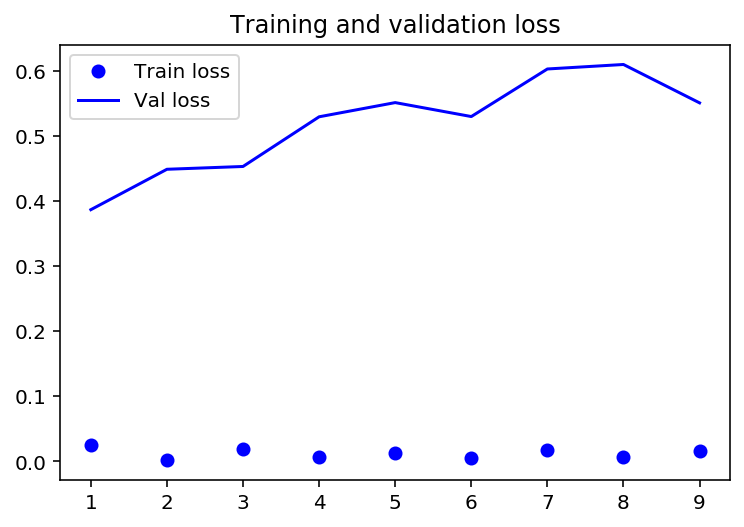

Training time is 7m 17s
K-Fold 5 end:
****************************************
K-Fold 6 start:
Epochs: 6/50... Trianing Loss:0.027... Val Loss:0.368... Val Accuracy:0.708
Epochs: 12/50... Trianing Loss:0.003... Val Loss:0.385... Val Accuracy:0.844
Epochs: 17/50... Trianing Loss:0.021... Val Loss:0.430... Val Accuracy:0.844
Epochs: 23/50... Trianing Loss:0.005... Val Loss:0.432... Val Accuracy:0.760
Epochs: 28/50... Trianing Loss:0.020... Val Loss:0.478... Val Accuracy:0.729
Epochs: 34/50... Trianing Loss:0.007... Val Loss:0.609... Val Accuracy:0.729
Epochs: 39/50... Trianing Loss:0.018... Val Loss:0.575... Val Accuracy:0.729
Epochs: 45/50... Trianing Loss:0.014... Val Loss:0.708... Val Accuracy:0.771
Epochs: 50/50... Trianing Loss:0.016... Val Loss:0.605... Val Accuracy:0.677


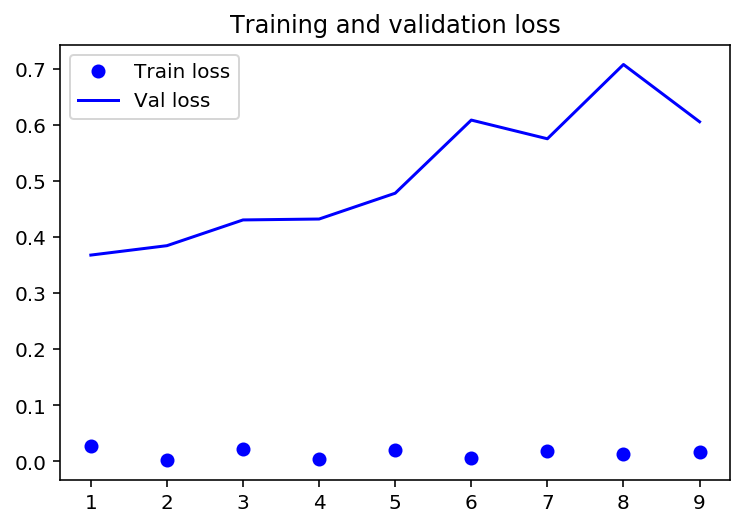

Training time is 7m 16s
K-Fold 6 end:
****************************************
K-Fold 7 start:
Epochs: 6/50... Trianing Loss:0.031... Val Loss:0.433... Val Accuracy:0.771
Epochs: 12/50... Trianing Loss:0.002... Val Loss:0.472... Val Accuracy:0.771
Epochs: 17/50... Trianing Loss:0.019... Val Loss:0.515... Val Accuracy:0.729
Epochs: 23/50... Trianing Loss:0.004... Val Loss:0.515... Val Accuracy:0.698
Epochs: 28/50... Trianing Loss:0.016... Val Loss:0.641... Val Accuracy:0.698
Epochs: 34/50... Trianing Loss:0.009... Val Loss:0.655... Val Accuracy:0.667
Epochs: 39/50... Trianing Loss:0.014... Val Loss:0.695... Val Accuracy:0.698
Epochs: 45/50... Trianing Loss:0.006... Val Loss:0.560... Val Accuracy:0.729
Epochs: 50/50... Trianing Loss:0.019... Val Loss:0.622... Val Accuracy:0.698


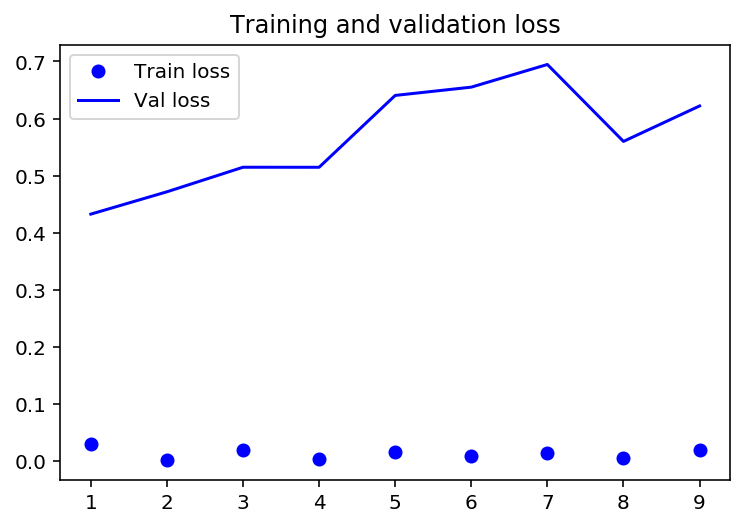

Training time is 7m 15s
K-Fold 7 end:
****************************************
K-Fold 8 start:
Epochs: 6/50... Trianing Loss:0.020... Val Loss:0.433... Val Accuracy:0.760
Epochs: 12/50... Trianing Loss:0.005... Val Loss:0.446... Val Accuracy:0.865
Epochs: 17/50... Trianing Loss:0.020... Val Loss:0.442... Val Accuracy:0.792
Epochs: 23/50... Trianing Loss:0.008... Val Loss:0.572... Val Accuracy:0.792
Epochs: 28/50... Trianing Loss:0.019... Val Loss:0.666... Val Accuracy:0.802
Epochs: 34/50... Trianing Loss:0.007... Val Loss:0.720... Val Accuracy:0.833
Epochs: 39/50... Trianing Loss:0.019... Val Loss:0.651... Val Accuracy:0.833
Epochs: 45/50... Trianing Loss:0.007... Val Loss:0.696... Val Accuracy:0.802
Epochs: 50/50... Trianing Loss:0.014... Val Loss:0.696... Val Accuracy:0.802


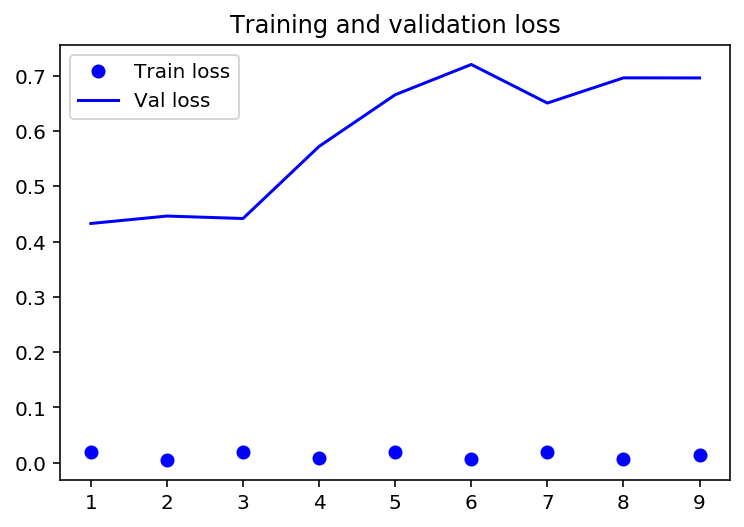

Training time is 7m 17s
K-Fold 8 end:
****************************************
K-Fold 9 start:
Epochs: 6/50... Trianing Loss:0.028... Val Loss:0.442... Val Accuracy:0.698
Epochs: 12/50... Trianing Loss:0.003... Val Loss:0.515... Val Accuracy:0.729
Epochs: 17/50... Trianing Loss:0.022... Val Loss:0.544... Val Accuracy:0.729
Epochs: 23/50... Trianing Loss:0.007... Val Loss:0.475... Val Accuracy:0.760
Epochs: 28/50... Trianing Loss:0.019... Val Loss:0.582... Val Accuracy:0.698
Epochs: 34/50... Trianing Loss:0.008... Val Loss:0.585... Val Accuracy:0.760
Epochs: 39/50... Trianing Loss:0.020... Val Loss:0.623... Val Accuracy:0.760
Epochs: 45/50... Trianing Loss:0.008... Val Loss:0.620... Val Accuracy:0.802
Epochs: 50/50... Trianing Loss:0.020... Val Loss:0.631... Val Accuracy:0.760


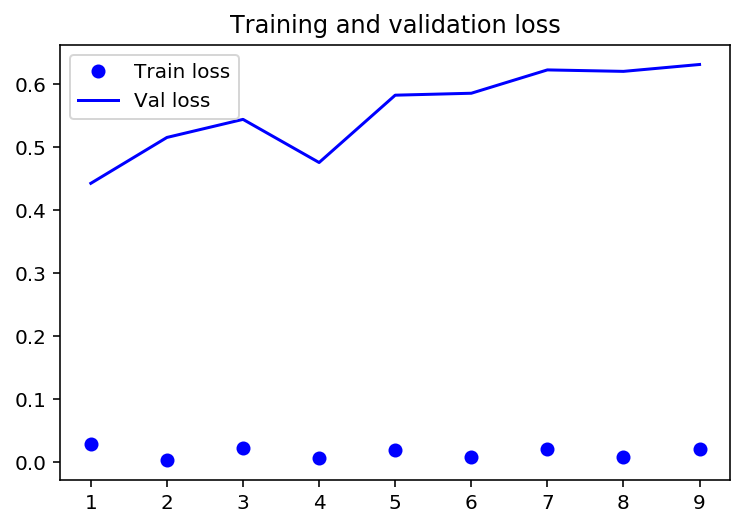

Training time is 7m 17s
K-Fold 9 end:
****************************************


In [4]:
for ii,(train_index,val_index) in enumerate(index):
    X_train = features[train_index]
    X_val = features[val_index]
    y_train = help.labels['label'].values[train_index]
    y_val = help.labels['label'].values[val_index]
    
    train_datasets = help.MyDataset(images=X_train,labels=y_train,shape=3,input_D=help.input_D,input_H=help.input_H,input_W=help.input_W)
    val_datasets = help.MyDataset(images=X_val,labels=y_val,shape=3,input_D=help.input_D,input_H=help.input_H,input_W=help.input_W)
    
    train_loader = torch.utils.data.DataLoader(dataset=train_datasets, batch_size=32, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_datasets, batch_size=8, shuffle=False)
    
    model_resnet50 = models.resnet50(pretrained=True)
    fc_features = model_resnet50.fc.in_features
    
    with torch.no_grad():
        pretrained_conv1 = model_resnet50.conv1.weight.clone()
        # Assign new conv layer with 79 input channels
        model_resnet50.conv1 = torch.nn.Conv2d(features.shape[1], 64, 7, 2, 3, bias=False)
        # Use same initialization as vanilla ResNet (Don't know if good idea)
        torch.nn.init.kaiming_normal_(model_resnet50.conv1.weight, mode='fan_out', nonlinearity='relu')
        # Re-assign pretraiend weights to first 3 channels
        # (assuming alpha channel is last in your input data)
        model_resnet50.conv1.weight[:, :3] = pretrained_conv1
    
    for param in model_resnet50.parameters():
        param.requires_grad = False
    
    #分类器在resnet50基础上修改，输出output_size为种类3
    resnet50_fc = nn.Sequential(nn.Linear(fc_features, help.num_seg_classes))
    model_resnet50.fc = resnet50_fc
    
    epochs = 50
    resnet50_2d_checkpoint_path = 'resnet50_2d_checkpoint_{}.pth'.format(ii)
    optimizer = optim.Adam(model_resnet50.fc.parameters())
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)
    print('K-Fold {} start:'.format(ii))
    indicators_2d_resnet50 = help.train_data(model_resnet50,train_loader,val_loader,epochs,optimizer,scheduler,help.print_every,help.criterion,resnet50_2d_checkpoint_path,help.device)
    print('K-Fold {} end:'.format(ii))
    print('*'*40)
    

In [6]:
test_datasets = MyDataset(datas=help.temp_data.reshape(232,79,95,79),shape=2,input_D=help.input_D,input_H=help.input_H,input_W=help.input_W,phase='test')
test_loader = torch.utils.data.DataLoader(dataset=test_datasets)

In [ ]:
loadmodel = help.load_checkpoint(help.resnet50_2d_checkpoint_path,'resnet50_2d',help.device)
help.all_predict(test_loader,loadmodel,help.device,help.result_2d_resnet50)

In [7]:
for i in range(10):
    resnet50_2d_checkpoint_path = 'resnet50_2d_checkpoint_{}.pth'.format(i)
    loadmodel = help.load_checkpoint(resnet50_2d_checkpoint_path,'resnet50_2d',help.device)
    print('Predict result with Model {}'.format(i))
    help.all_predict(temp_loader,loadmodel,help.device,'submit_2D_Resnet50_{}.csv'.format(i))
    print('*'*40)

Predict result with Model 0
0 test data have been predicted
----------------------------------------
20 test data have been predicted
----------------------------------------
40 test data have been predicted
----------------------------------------
60 test data have been predicted
----------------------------------------
80 test data have been predicted
----------------------------------------
100 test data have been predicted
----------------------------------------
120 test data have been predicted
----------------------------------------
140 test data have been predicted
----------------------------------------
160 test data have been predicted
----------------------------------------
180 test data have been predicted
----------------------------------------
200 test data have been predicted
----------------------------------------
220 test data have been predicted
----------------------------------------
Test time is 0m 10s
****************************************
Predict result wi

100 test data have been predicted
----------------------------------------
120 test data have been predicted
----------------------------------------
140 test data have been predicted
----------------------------------------
160 test data have been predicted
----------------------------------------
180 test data have been predicted
----------------------------------------
200 test data have been predicted
----------------------------------------
220 test data have been predicted
----------------------------------------
Test time is 0m 10s
****************************************
Predict result with Model 9
0 test data have been predicted
----------------------------------------
20 test data have been predicted
----------------------------------------
40 test data have been predicted
----------------------------------------
60 test data have been predicted
----------------------------------------
80 test data have been predicted
----------------------------------------
100 test data hav

In [30]:

result_df = pd.DataFrame(columns=['testa_id','label'])
result_0 = pd.read_csv('submit_2D_Resnet50_0.csv')
result_1 = pd.read_csv('submit_2D_Resnet50_1.csv')
result_2 = pd.read_csv('submit_2D_Resnet50_2.csv')
result_3 = pd.read_csv('submit_2D_Resnet50_3.csv')
result_4 = pd.read_csv('submit_2D_Resnet50_4.csv')
result_5 = pd.read_csv('submit_2D_Resnet50_5.csv')
result_6 = pd.read_csv('submit_2D_Resnet50_6.csv')
result_7 = pd.read_csv('submit_2D_Resnet50_7.csv')
result_8 = pd.read_csv('submit_2D_Resnet50_8.csv')
result_9 = pd.read_csv('submit_2D_Resnet50_9.csv')

for i in range(result_0.shape[0]):
    label_item = []
    label_item.append(result_0.iloc[i,1])
    label_item.append(result_1.iloc[i,1])
    label_item.append(result_2.iloc[i,1])
    label_item.append(result_3.iloc[i,1])
    label_item.append(result_4.iloc[i,1])
    label_item.append(result_5.iloc[i,1])
    label_item.append(result_6.iloc[i,1])
    label_item.append(result_7.iloc[i,1])
    label_item.append(result_8.iloc[i,1])
    label_item.append(result_9.iloc[i,1])
    label = max(label_item, key=label_item.count)
    if i < 116:
        result_df.loc[result_df.shape[0]] = [('testa_{}'.format(i)),label]
    else:
        result_df.loc[result_df.shape[0]] = [('testb_{}'.format(i - 116)),label]
result_df.to_csv('submit_2D_Resnet50.csv',index=False)